In [2]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Cargamos la base de datos y eliminamos la columna Serial No
data = pd.read_csv('Data_pot.csv',
                 skiprows=1,
                 names=[' ', ' One', 'UrbanP', 'LateB', 'WineC', 'LiquorC','CDR'],
                 na_values=['?'],
                 index_col=[' '])


In [114]:
# Lectura de los 5 primeros datos
data.head(5)

,One,UrbanP,LateB,WineC,LiquorC,CDR
,,,,,,
1,1,44,33.2,5,30,41.2
2,1,43,33.8,4,41,31.7
3,1,48,40.6,3,38,39.4
4,1,52,39.2,7,48,57.5
5,1,71,45.5,11,53,74.8


In [115]:
# Mostrar el encabezado 
data.columns

Index([' One', 'UrbanP', 'LateB', 'WineC', 'LiquorC', 'CDR'], dtype='object')

In [116]:
# Revisión de datos nulos
data.isnull().sum()

 One       0
UrbanP     0
LateB      0
WineC      0
LiquorC    0
CDR        0
dtype: int64

In [117]:
# Información de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 46
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    One     46 non-null     int64  
 1   UrbanP   46 non-null     int64  
 2   LateB    46 non-null     float64
 3   WineC    46 non-null     int64  
 4   LiquorC  46 non-null     int64  
 5   CDR      46 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 2.5 KB


In [118]:
# Resumen estadístico
data.describe()

,One,UrbanP,LateB,WineC,LiquorC,CDR
count,46.0,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1.0,56.260870,41.476087,11.586957,57.500000,63.493478
std,0.0,15.747218,7.044342,6.920424,22.140712,23.447979
min,1.0,27.000000,31.200000,2.000000,26.000000,28.000000
25%,1.0,44.250000,35.625000,6.250000,41.500000,48.900000
50%,1.0,55.000000,42.250000,10.000000,56.000000,57.650000
75%,1.0,65.000000,45.825000,15.750000,68.750000,75.700000
max,1.0,87.000000,56.100000,31.000000,149.000000,129.900000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a10bb0e50>,
      dtype=object)

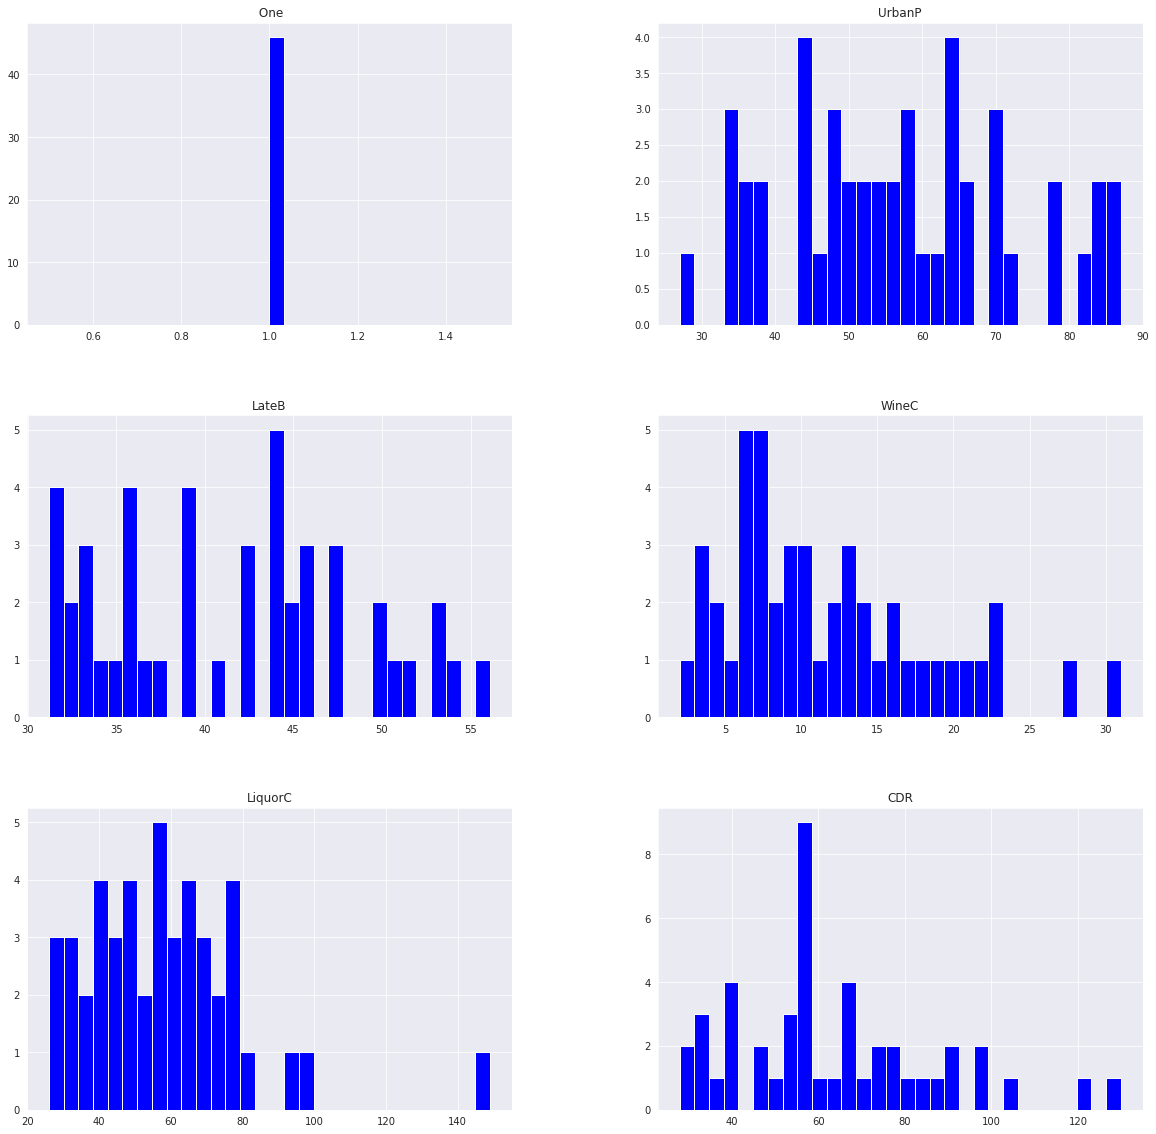

In [119]:
# Histogramas de las variables 
data.hist(bins = 30, figsize = (20, 20), color='b')

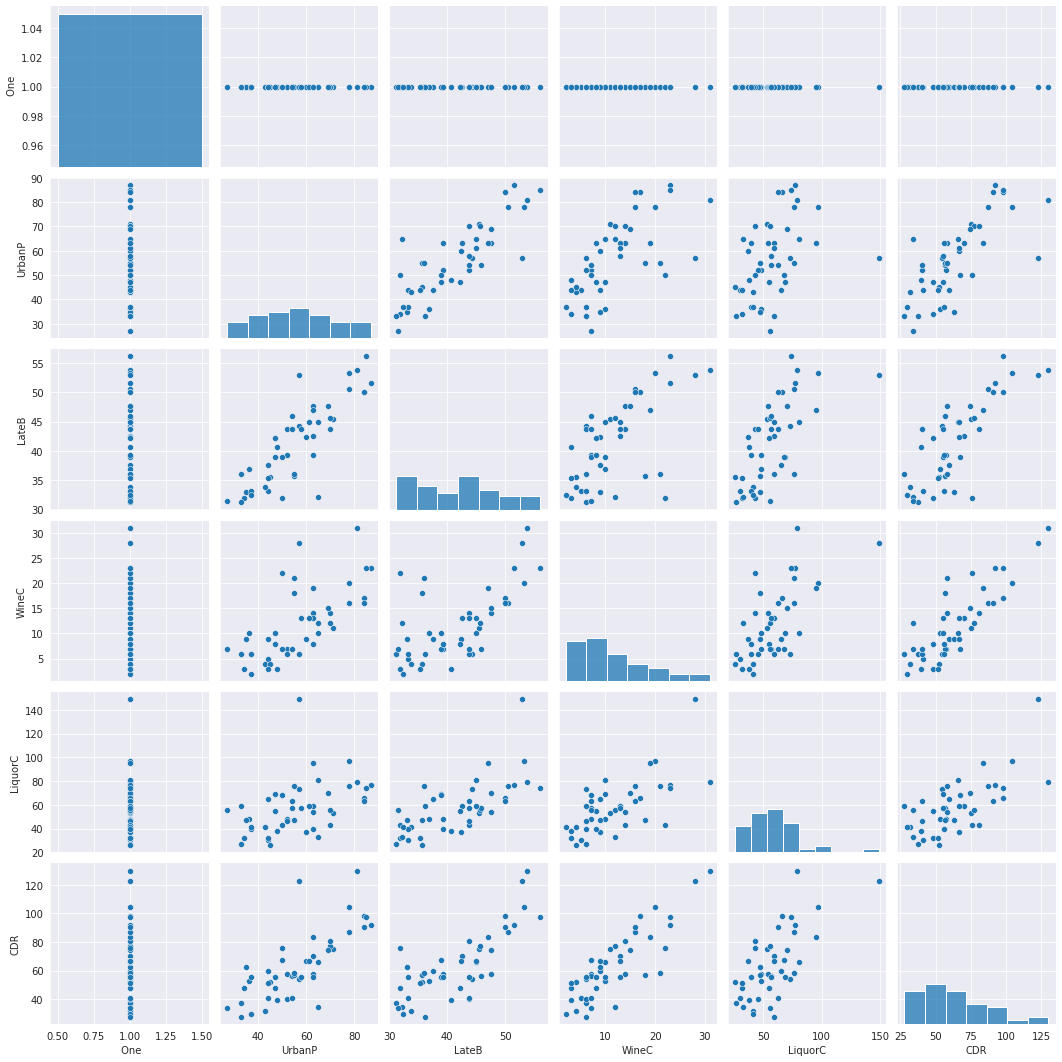

In [120]:
# Distribución de los datos de la relación de las variables entre sí
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


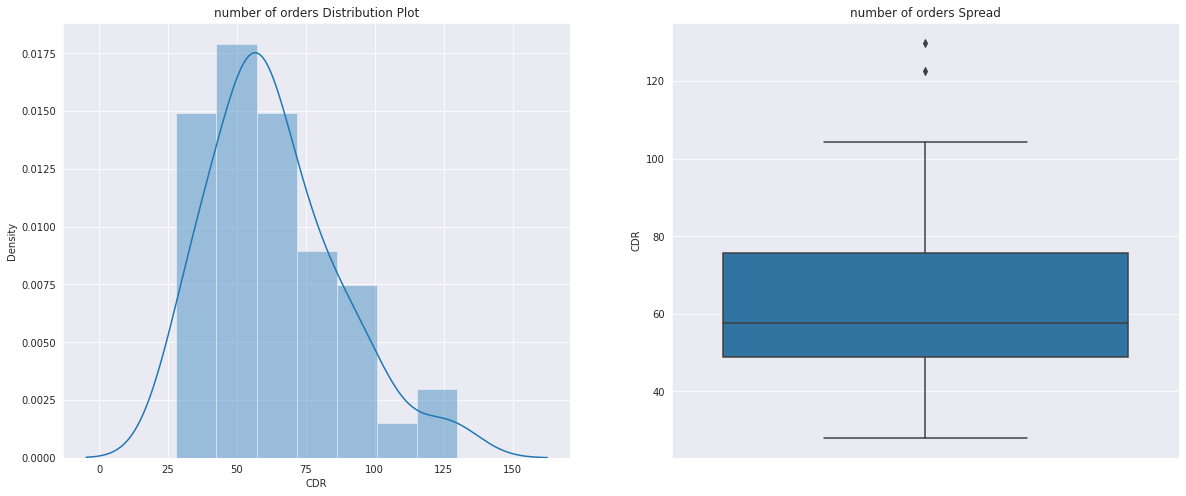

In [121]:
# Visualización de la variable objetivo
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.CDR)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.CDR)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


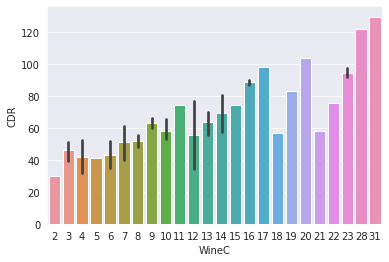

In [122]:
# Cirro por Vino
sb.barplot(data.WineC,data.CDR)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


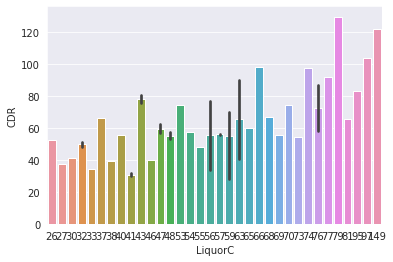

In [123]:
#Cirro por Liquor
sb.barplot(data.LiquorC,data.CDR)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


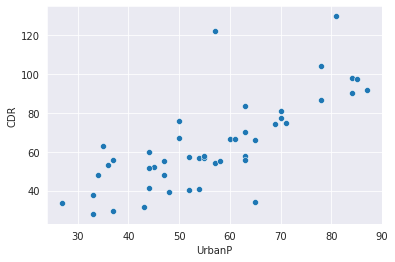

In [124]:
# Distribución de los datos de UrbanP según CDR
sb.scatterplot(data.UrbanP,data.CDR)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


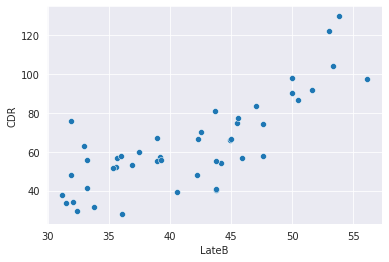

In [125]:
sb.scatterplot(data.LateB,data.CDR)

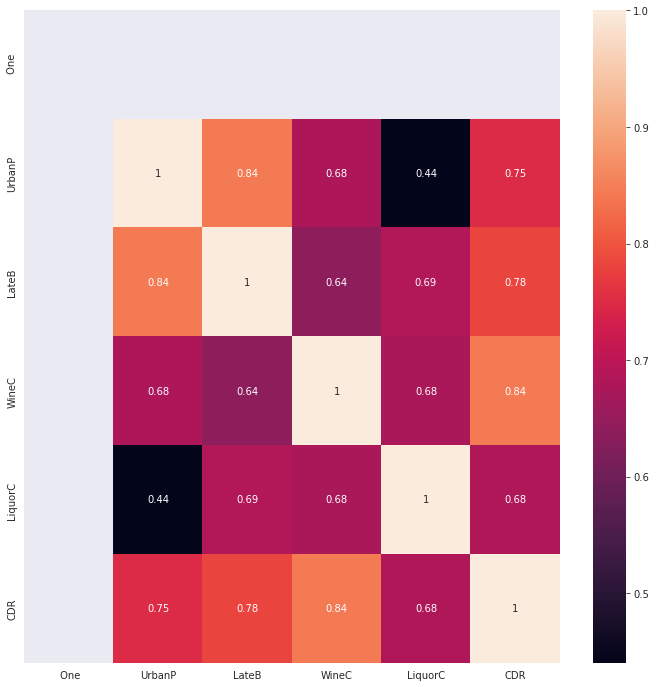

In [126]:
# Matriz de correlación
corr_matrix = data.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [127]:
# Correlacion de las variables con respecto a la probabilidad de admisión
(data.corr()**2)["CDR"].sort_values(ascending = False)[1:]

WineC      0.713368
LateB      0.612657
UrbanP     0.561112
LiquorC    0.465082
 One            NaN
Name: CDR, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


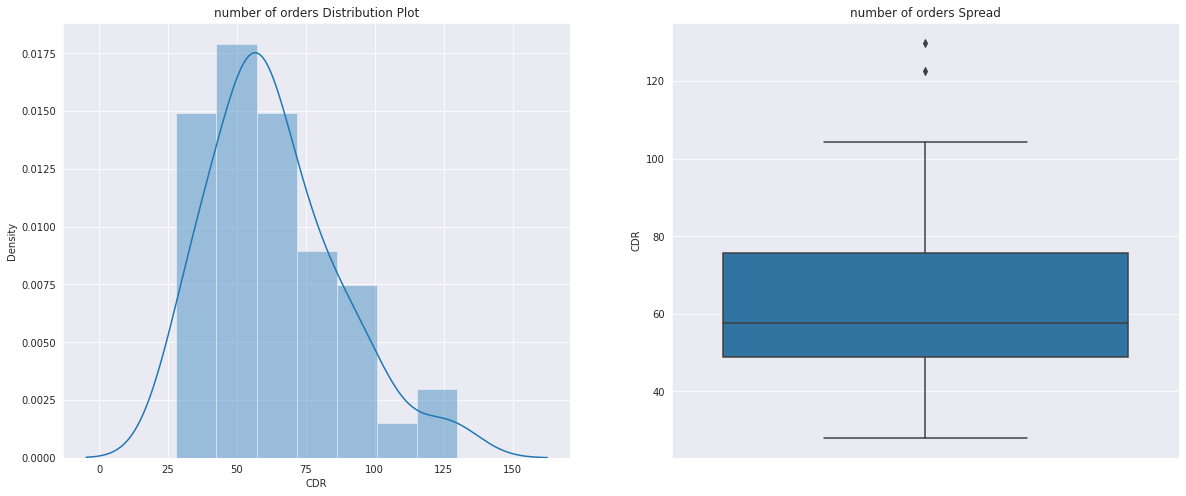

In [129]:
# Gráficas mejoradas
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.CDR)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.CDR)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


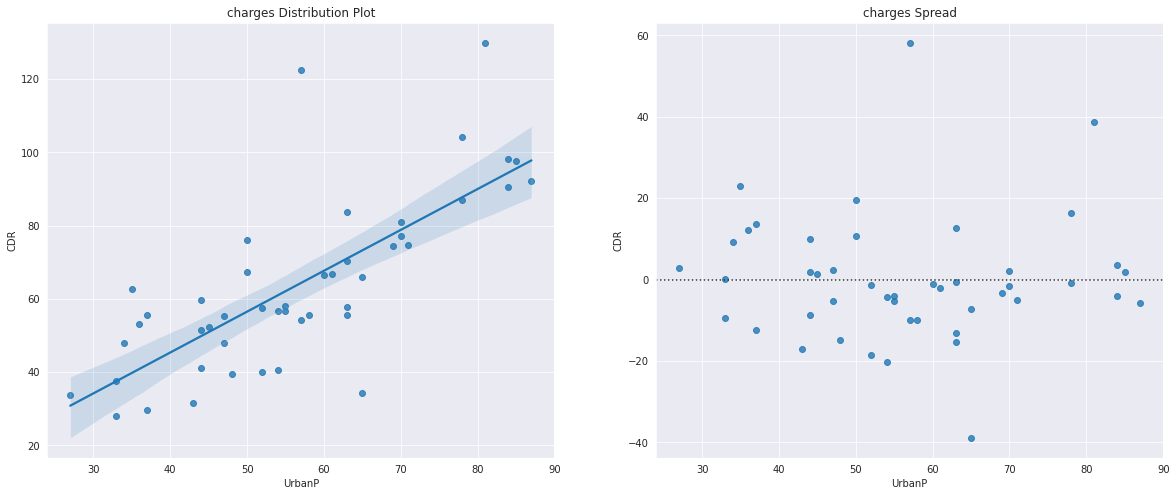

In [130]:
# Regresión lineal y residuales de UrbanP
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.UrbanP, y=data.CDR)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.UrbanP, data.CDR)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


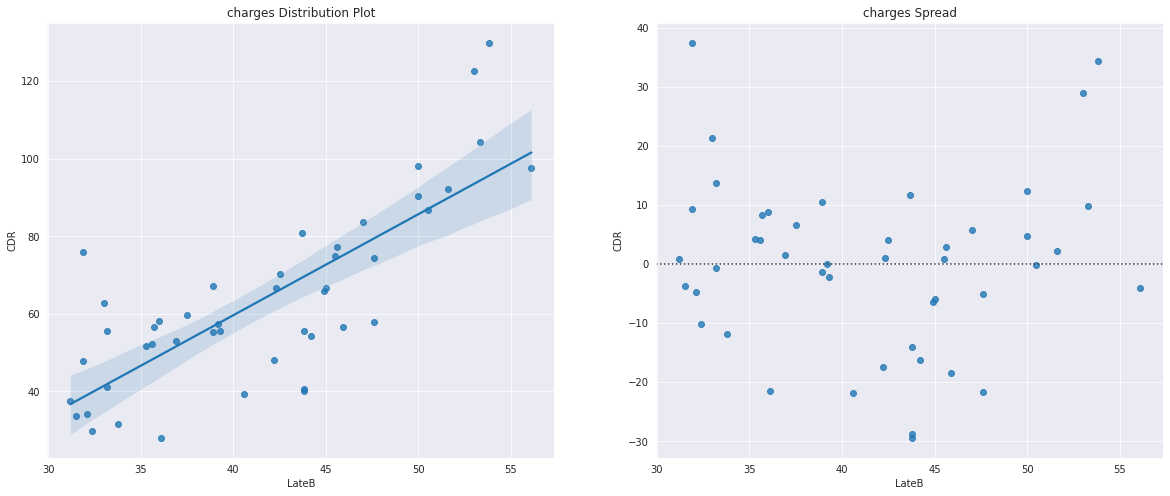

In [131]:
# Regresión lineal y residuales de LateB
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.LateB, y=data.CDR)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.LateB, data.CDR)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


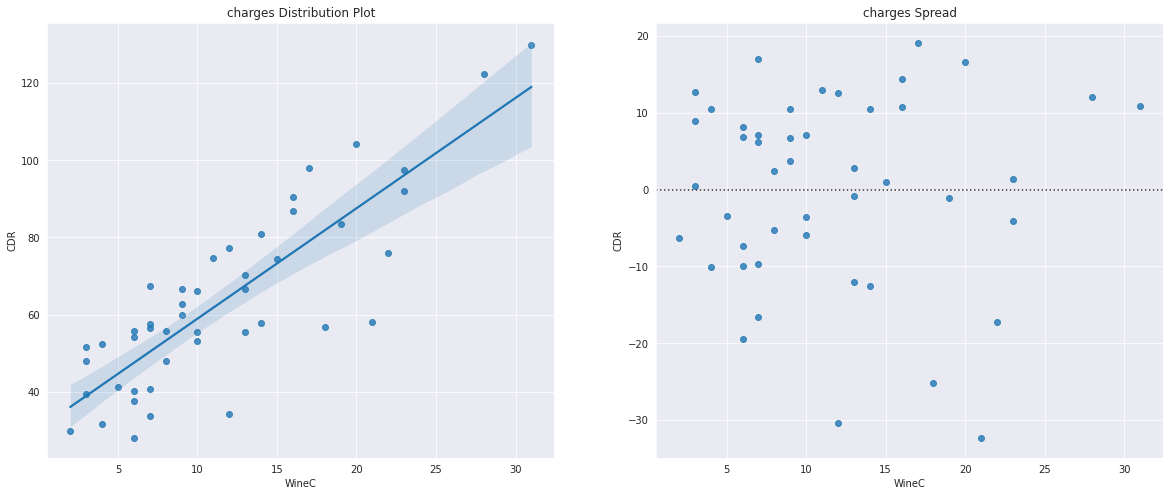

In [132]:
# Regresión lineal y residuales de LateB
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.WineC, y=data.CDR)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.WineC, data.CDR)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


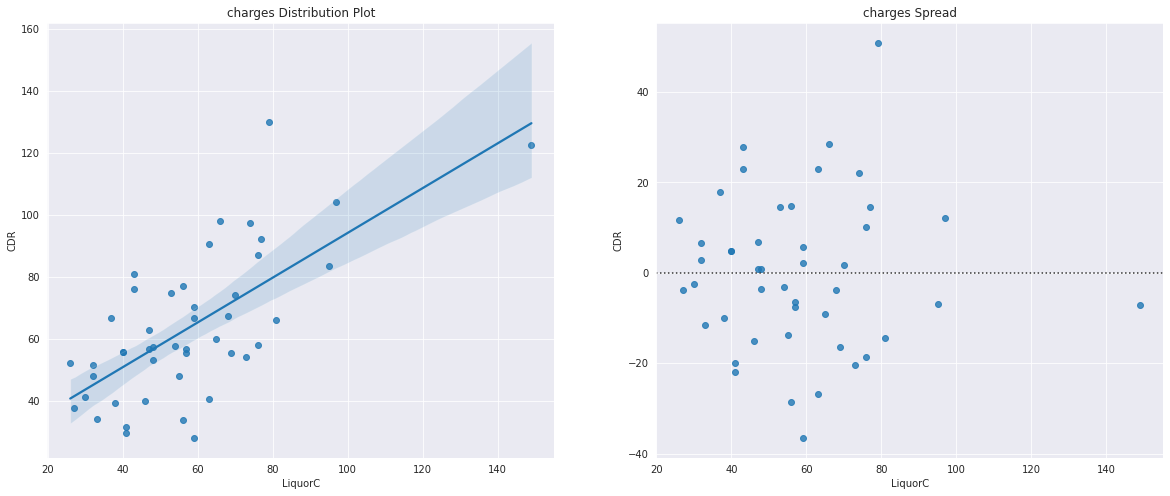

In [133]:
# Regresión lineal y residuales de LateB
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.LiquorC, y=data.CDR)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.LiquorC, data.CDR)

plt.show()

**REGRESIÓN LINEAL**

In [134]:
df = data.sample(5)
df

,One,UrbanP,LateB,WineC,LiquorC,CDR
3,1,52,39.2,7,48,57.5
34,1,47,42.2,8,55,48.0
37,1,50,31.9,22,43,76.0
18,1,33,31.2,6,27,37.6
43,1,44,35.3,3,32,51.6


In [154]:
df1=df.iloc[:,[1,5]] # 
df1_x=df1.iloc[:,[1]] # establecer CDR como vector X
x=df1_x.iloc[:,0] # Convertir el objeto a una columna numérica
x=pd.to_numeric(x)

In [155]:
df1_y=df1.iloc[:,[0]] # establecer la CDR como vector Y
y=df1_y.iloc[:,0] # Convertir el objeto a columna numérico

In [156]:
# Calculamos la media del vector x
df1_x_mean=np.mean(df1_x)
df1_x_mean

CDR    54.14
dtype: float64

In [157]:
# Calculamos la media del vector y
df1_y_mean=np.mean(df1_y)
df1_y_mean

UrbanP    45.2
dtype: float64

In [158]:
# Calculamos la desviación de x 
deviation_x=[]
for i in x:
    deviation_x.append(i-df1_x_mean)


In [159]:
deviation_x

[CDR    3.36
 dtype: float64, CDR   -6.14
 dtype: float64, CDR    21.86
 dtype: float64, CDR   -16.54
 dtype: float64, CDR   -2.54
 dtype: float64]

In [160]:
# Calculamos la desviación de y
deviation_y=[]
for i in y:
    deviation_y.append(i-df1_y_mean)

In [161]:
deviation_y

[UrbanP    6.8
 dtype: float64, UrbanP    1.8
 dtype: float64, UrbanP    4.8
 dtype: float64, UrbanP   -12.2
 dtype: float64, UrbanP   -1.2
 dtype: float64]

In [162]:
# Calculamos el producto de las desviaciones y la sumatoria total
product_deviation=np.array(deviation_x)*np.array(deviation_y) 
Sum_product_deviation=np.sum(product_deviation) 

Sum_product_deviation 

321.56

In [164]:
# Calculamos el cuadrado de la desviación de x y la suma total
Sq_x_deviation=np.array(deviation_x)**2 
Sum_Sq_x_deviation=np.sum(Sq_x_deviation) 

Sum_Sq_x_deviation

806.872

In [165]:
# calcular el coeficiente de regresión, la pendiente de la línea de regresión
Regression_coefficient=Sum_product_deviation/Sum_Sq_x_deviation

Regression_coefficient

0.39852665602474746

In [166]:
# Calculamos el intercepto
intercept=np.float(df1_y_mean)-(Regression_coefficient*np.float(df1_x_mean)) 

intercept

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


23.623766842820174

In [169]:
# Calculamos la CDR teniendo en cuenta solo URBANP

test_data = [34,70]

predicted_y1=Regression_coefficient*test_data[0]+intercept 
predicted_y2=Regression_coefficient*test_data[1]+intercept 

print("UrbanP =", test_data[0], 
      "CDR: ", predicted_y1)
print()
print("UrbanP =", test_data[1], 
      "CDR: ", predicted_y2)

UrbanP = 34 CDR:  37.17367314766159

UrbanP = 70 CDR:  51.520632764552495


**Implementación de regresión lineal con la biblioteca SKLearn**

In [170]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
# Entrenando el modelo con X como característica e Y como objetivo
model1=model1.fit(df1_x,df1_y)

In [171]:
# imprimir el coeficiente de regresión o la pendiente de la línea de regresión
 
print(model1.coef_)

[[0.39852666]]


In [172]:
# Imprimir el intercepto
 
print(model1.intercept_)

[23.62376684]


In [173]:
# Se calcula la UrbanP de GRE
 
x_test=pd.DataFrame({"UrbanP Score":[34,70]})
p=model1.predict(x_test)
p

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- UrbanP Score
Feature names seen at fit time, yet now missing:
- CDR

  warnings.warn(message, FutureWarning)


array([[37.17367315],
       [51.52063276]])

La regresión Lineal es útil si los dos vectores tienen una relación más presisa u no existe dependencia de más variables o columnas entro del dataSet. UrbanP por si solo no es determinante para encontrar nuestro CDR y viceversa pero nos acerca a encontrar el Modelo lineal que nos han dado. De usar las 4 columnas lograríamos un mejor resultado